In [181]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

### Laplace using Jacobi Method

In [182]:
#DEFINING INITIAL CONDITIONS
nx=50 #nodes in x direction
ny=50 #nodes in y direction
tol=1e-6 #toleranace
error=1 #intializing the error value
x=np.linspace(0,1,nx) #to create mesh grid to plot solutions
y=np.linspace(0,1,ny)

U=np.zeros((nx,ny)) #initial and boundary cnditions given
U[0,:]=100
U_new=U.copy()


In [183]:
#JACOBI ALGORITHM
while error>tol: #convergence conditon
    for j in range(1,ny-2): #loop over columns
        for i in range(1,nx-2):  #loop over rows
              U_new[i][j]=(1/4)*(U[i][j-1]+U[i][j+1]+U[i-1][j]+U[i+1][j]) #laplace iterative scheme
    error=np.max(np.abs(U_new-U)) #defining the error value
    U=U_new.copy()


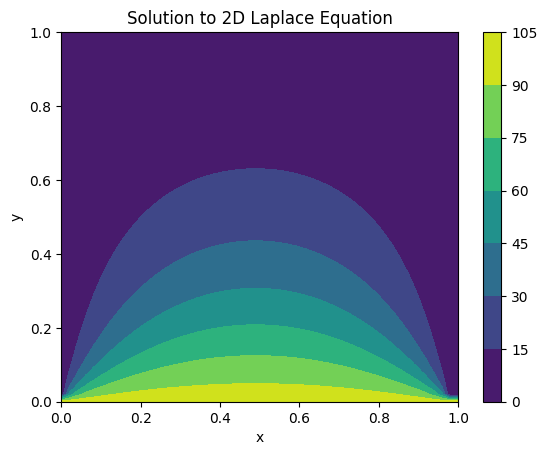

In [184]:
#PLOTTING THE OUTPUT
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,U)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to 2D Laplace Equation')
plt.show()

### Laplace using Gauss Seidal Method
In general, Gauss-Seidel method is often faster and more efficient than Jacobi method for solving linear systems of equations or partial differential equations, especially for smoother solutions or when the matrix is diagonally dominant. This is because Gauss-Seidel method makes use of the most up-to-date information at each grid point as soon as it becomes available, while Jacobi method uses the information from the previous iteration for all grid points simultaneously.

However, Gauss-Seidel method can also be more prone to stability issues and slower convergence for certain types of problems, especially when the matrix is not diagonally dominant or when the solution has sharp gradients or other irregularities. Additionally, Gauss-Seidel method requires more memory due to the in-place updates of the solution, which can be a limiting factor for very large systems.

Therefore, the choice of method ultimately depends on the specific problem and the trade-offs between efficiency, stability, and memory usage.

In [190]:
#DEFINING INITIAL CONDITIONS
nx1 = 50 #nodes in x direction
ny1 = 50 #nodes in y direction
tol1 = 1e-6
error1 = 1
x1 = np.linspace(0, 1, nx)
y1 = np.linspace(0, 1, ny)

U1 = np.zeros((nx, ny))
U1[0, :] = 100
U_new1 = U1.copy()

In [191]:
#GAUSS SEIDEL ALGORITHM
while error1 > tol1: #convergence condition
    for j in range(1, ny1-2):
        for i in range(1, nx1-1):
            U_new1[i][j] = (1/4) * (U1[i][j-1] + U1[i][j+1] + U1[i-1][j] + U1[i+1][j])
        error1 = np.max(np.abs(U_new1 - U1))
        U1 = U_new1.copy()
        

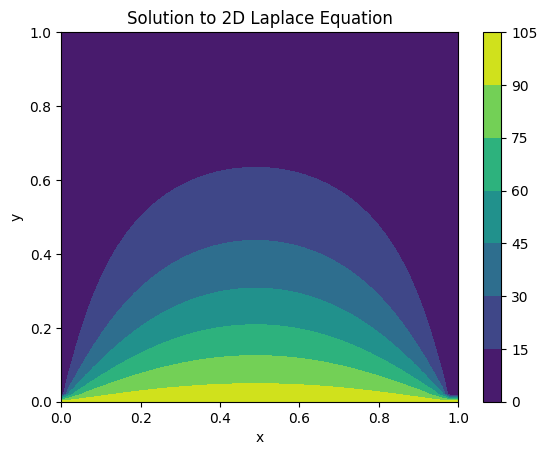

In [192]:
#PLOTTING THE OUTPUT
X1,Y1=np.meshgrid(x1,y1)
plt.contourf(X1,Y1,U1)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to 2D Laplace Equation')
plt.show()

### Heat Equation Explicit Scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h=0.025
k=0.00025
x=np.arange(0,1+h,h)
t=np.arange(0,0.1+k,k)


n=len(x)
m=len(t)


In [3]:
T=np.zeros((n,m))


#initial condition
T[:,0]=100.0

#boundary condition
T[0,:]=0
T[-1,:]=0

In [4]:
T #row is defined as postion and column is defined as time

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [5]:
a=k/(h**2) 
print(a)

0.3999999999999999


In [6]:
for j in range(1,m):
    for i in range(1,n-1):
        T[i,j]= a*T[i-1,j-1] + (1-2*a)*T[i,j-1] + a*T[i+1,j-1]

In [7]:
T

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [100.        ,  60.        ,  52.        , ...,   3.73844823,
          3.72920221,   3.71997957],
       [100.        , 100.        ,  84.        , ...,   7.4537814 ,
          7.43534781,   7.41696083],
       ...,
       [100.        , 100.        ,  84.        , ...,   7.4537814 ,
          7.43534781,   7.41696083],
       [100.        ,  60.        ,  52.        , ...,   3.73844823,
          3.72920221,   3.71997957],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

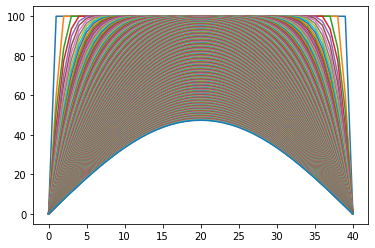

In [8]:
plt.plot(T)
#plt.legend(t)
plt.show()

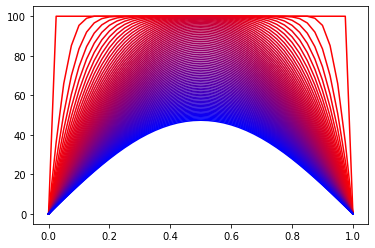

In [9]:
R=np.linspace(1,0,m)
B=np.linspace(0,1,m)
G=0

for j in range(0,m,5):
    plt.plot(x,T[:,j],color=[R[j],G,B[j]])
